_ref:_ <https://robertmarks.org/REPRINTS/2015_AlgorithmicSpecifiedComplexityInTheGameOfLife.pdf>

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import complexity as c
import pandas as pd
import numpy as np
import saver as s

d = pd.read_csv('item/index.csv',dtype={'Name':str})

d['K conditional complexity'] = ''
d['Causal complexity'] = ''
d['Specified complexity'] = ''
d['Array'] = ''

In [2]:
for name in d.Name:
    d.loc[d.Name==name,'K conditional complexity'] = c.kolmogorov_conditional_complexity(d.Formula[d.Name==name].item())

    with open(f'item/{name}.npy', 'rb') as f:
            d.loc[d.Name==name,'Array'] = [np.load(f)]
    
    d.loc[d.Name==name,'Causal complexity'] = c.causal_complexity(d.Array[d.Name==name].item())

d['Specified complexity'] = d['Causal complexity']-d['K conditional complexity']
d['Spontaneous emergence'] = d['Spontaneous emergence'].astype(int)
d

,Name,Category,Formula,Spontaneous emergence,K conditional complexity,Causal complexity,Specified complexity,Array
0,block,oscillators,X = X ⊕ #0,1,26,16,-10,"[[False, False, False, False], [False, True, T..."
1,blinker,oscillators,X = X ⊕ ^2 #0,1,31,15,-16,"[[False, False, False, False, False], [False, ..."
2,caterer,oscillators,X = X ⊕ ^3 #0,1,31,80,49,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,mazing,oscillators,X = X ⊕ ^4 #0,1,31,81,50,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]..."
4,pseudo-barberpole,oscillators,X = X ⊕ ^5 #0,0,31,196,165,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,unix,oscillators,X = X ⊕ ^6 #0,1,31,100,69,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,burloaferimeter,oscillators,X = X ⊕ 7 #0,0,29,156,127,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,figure_eight,oscillators,X = X ⊕ ^8 #0,1,31,64,33,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0...."
8,29P9,oscillators,X = X ⊕ ^9 #0,0,31,144,113,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,glider,spaceship,X ↓ → = X ⊕ ^4 #0,1,41,25,-16,"[[False, False, False, False, False], [False, ..."


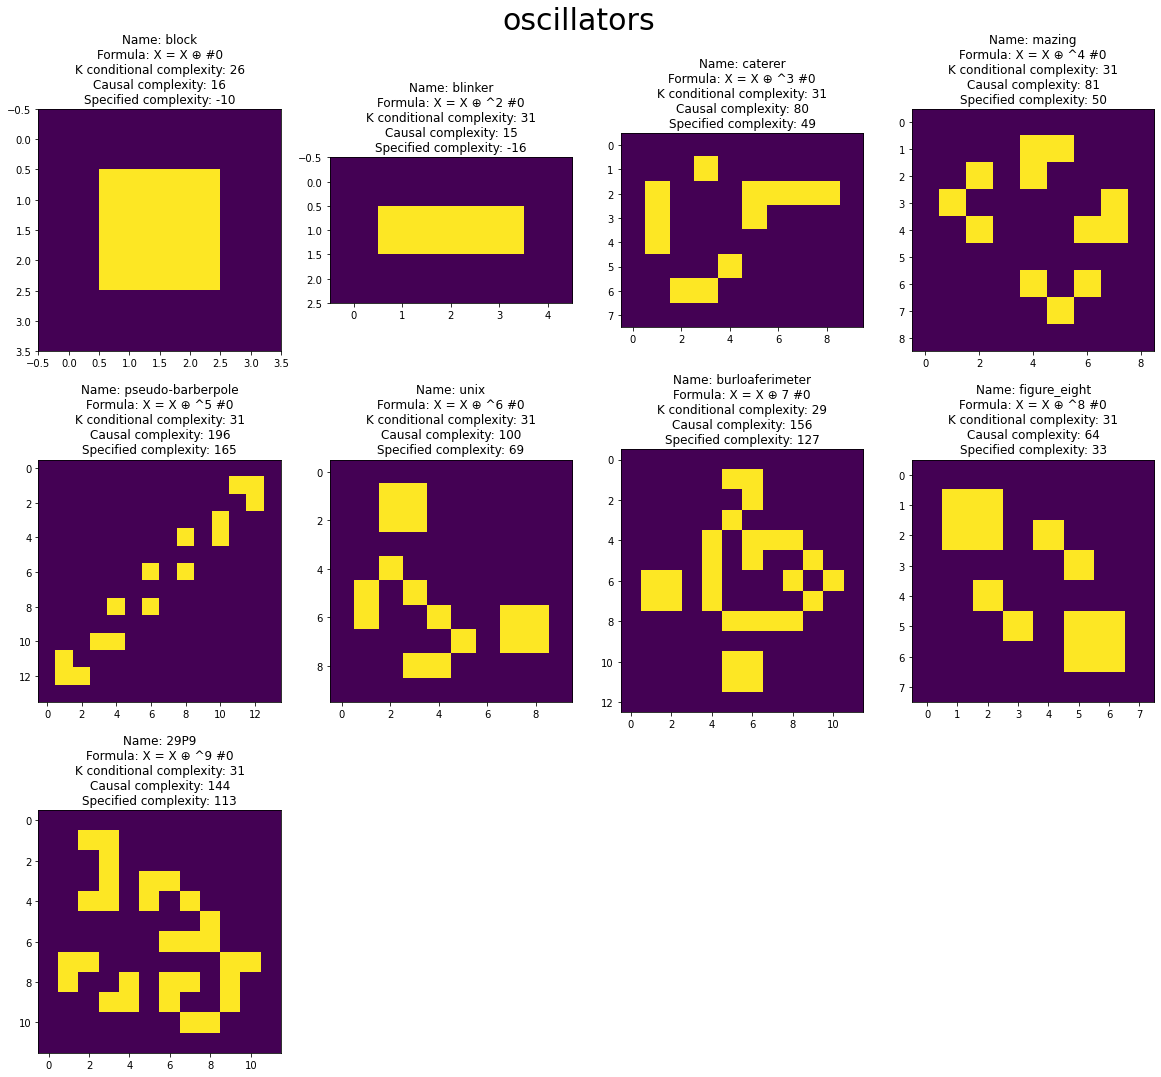

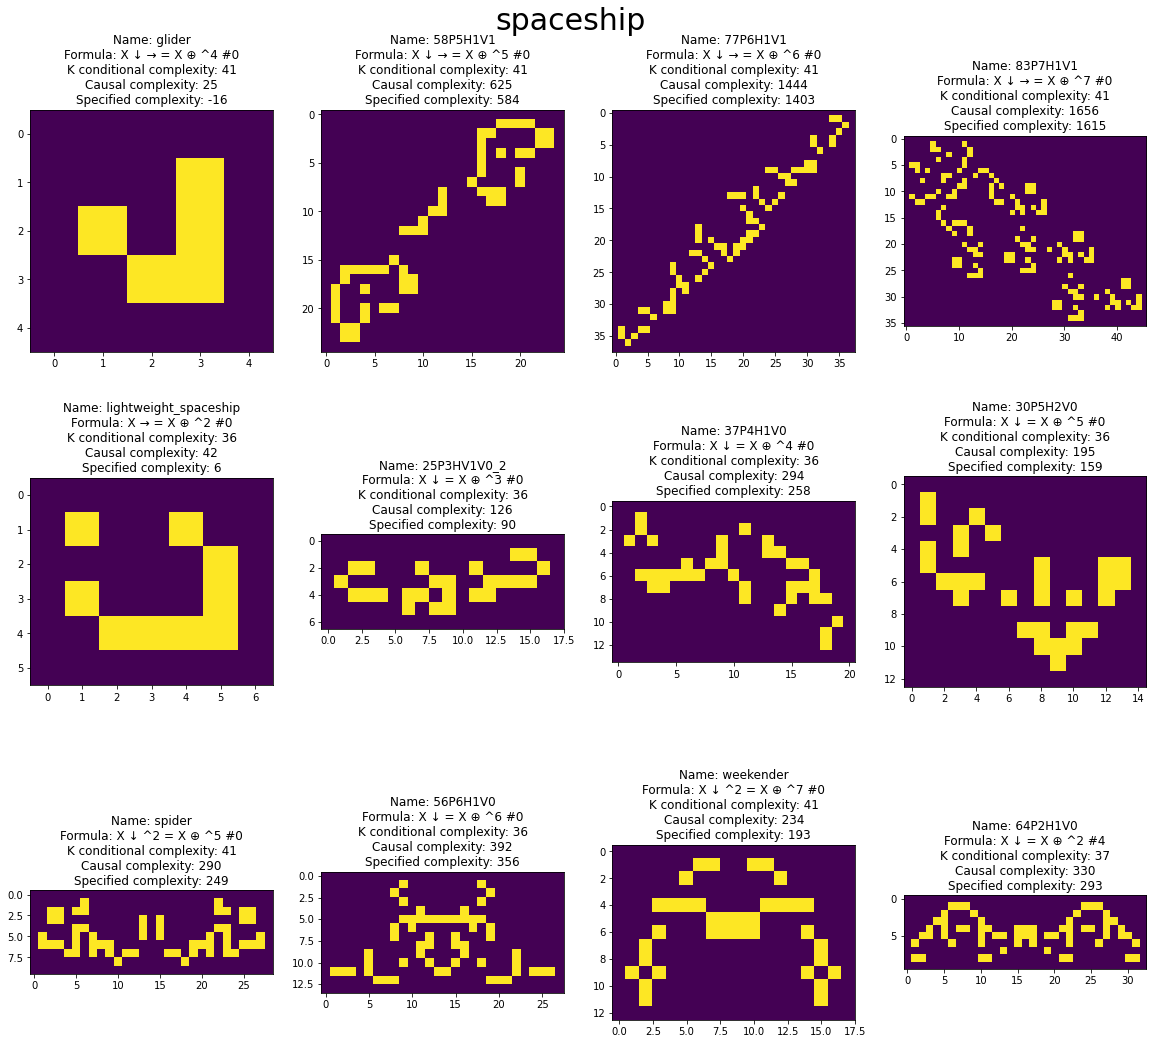

In [3]:
for category in d.Category.unique():
    nb_col = d[d.Category==category].index.shape[0]
    nb_row = (nb_col-1)//4+1
    if nb_col>4: nb_col=4
    
    plt.figure(figsize=(20,6))
    plt.suptitle(category,size=30)

    for i,id in enumerate(d[d.Category==category].index):
        plt.subplot(nb_row,nb_col,1+i)
        plt.imshow(d.loc[id].Array)
        plt.title(f"Name: {d.loc[id].Name}\nFormula: {d.loc[id].Formula}\nK conditional complexity: {d.loc[id]['K conditional complexity']}\nCausal complexity: {d.loc[id]['Causal complexity']}\nSpecified complexity: {d.loc[id]['Specified complexity']}")

    plt.subplots_adjust(bottom=-1.5,top=0.8)
    plt.show()

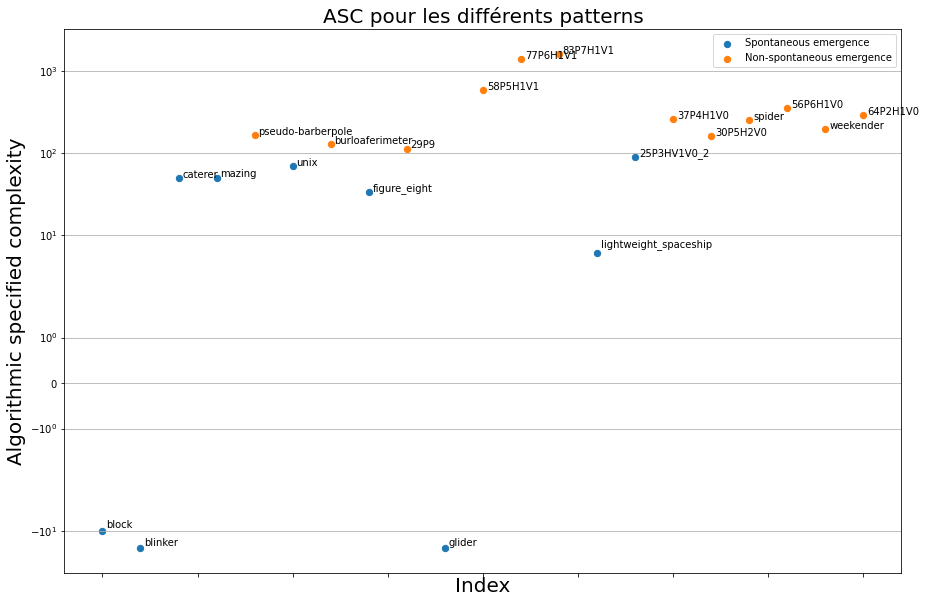

In [20]:
plt.figure(figsize=(15,10))
cmap = mpl.cm.get_cmap('viridis', 2)

plt.scatter(x=d[d['Spontaneous emergence']==1].index,y=d.loc[d['Spontaneous emergence']==1,'Specified complexity'],s=40,label='Spontaneous emergence')
plt.scatter(x=d[d['Spontaneous emergence']==0].index,y=d.loc[d['Spontaneous emergence']==0,'Specified complexity'],s=40,label='Non-spontaneous emergence')
for i in d.index:
    plt.annotate(d.Name[i],(i+0.1,d['Specified complexity'][i]+1))

plt.title('ASC pour les différents patterns',size=20)
plt.xlabel('Index',size=20); plt.ylabel('Algorithmic specified complexity',size=20)
plt.grid(axis='y'); plt.tick_params(axis='x',labelbottom=False); plt.yscale('symlog')
plt.legend(); plt.show()

---
# Build patterns

> ## From .npy files

In [7]:
def add_blank(array):
    array = np.vstack((array,np.zeros(array.shape[1])))
    array = np.vstack((np.zeros(array.shape[1]),array))
    array = np.hstack((array,np.zeros(array.shape[0]).reshape([-1,1])))
    array = np.hstack((np.zeros(array.shape[0]).reshape([-1,1]),array))
    return array

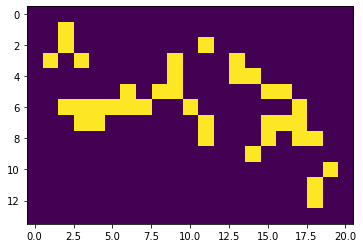

In [13]:
name = '37P4H1V0'

with open(f'item/{name}.npy', 'rb') as f:
       array = np.load(f)

#array = add_blank(array)

plt.imshow(array)
plt.show()

In [9]:
#s.save(name,array)

> ## Save new patterns

In [10]:
#    [0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0],

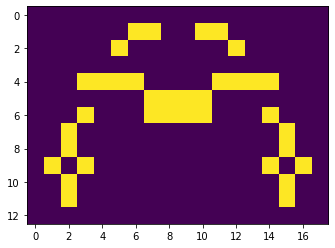

In [11]:
array = np.array([
    [0,1,0,0,0,0,0,0,0,0, 0,0,0,0,1,0],
    [0,1,0,0,0,0,0,0,0,0, 0,0,0,0,1,0],
    [1,0,1,0,0,0,0,0,0,0, 0,0,0,1,0,1],
    [0,1,0,0,0,0,0,0,0,0, 0,0,0,0,1,0],
    [0,1,0,0,0,0,0,0,0,0, 0,0,0,0,1,0],
    [0,0,1,0,0,0,1,1,1,1, 0,0,0,1,0,0],
    [0,0,0,0,0,0,1,1,1,1, 0,0,0,0,0,0],
    [0,0,1,1,1,1,0,0,0,0, 1,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0, 0,1,0,0,0,0],
    [0,0,0,0,0,1,1,0,0,1, 1,0,0,0,0,0],

    
],dtype=bool)[::-1,::-1]

array = add_blank(array)

plt.imshow(array)
plt.show()

In [12]:
#s.save('',array)